In [1]:
import pandas as pd
from pyzotero import zotero
from habanero import Crossref
import habanero as hb
import matplotlib.pyplot as plt
import seaborn as sns
from scholar import scholar

In [16]:
data_anno = pd.read_excel('CrossRef_DataFrame_wAnno_socedu.xlsx', sheet_name = 'compressed')
data_anno

,DOI,Country,Robot/s used (?),Adult vs Children,nyear,wtype,"Role (Pr = presenter, TA = teaching assistant, Te = teacher, Pe = peer, Tu = tutor)",Curriculum,nb students per robot,students_nb,Communicative gestures vs functional actions,WoZ,Autonomy,Contain Retention component?,Matos,Material,Included,Cognitive/Affective,Cognitive_Affective
0,10.21125/inted.2020.1926,Greece,Nao,Ch,2020,2020,Pe,handwriting,1,1,CO+FU,No,Scripted,No,tablet,tablet,Yes,cognitive and affective,CA
1,10.3389/frobt.2020.00015,Spain,Haru,Ch,2020,2020,Tu,problem solving,1,1,CO,Yes,WOZ,No,tangible(s),tangibles,Yes,cognitive,C
2,10.3389/frobt.2019.00148,Israel,Nao,Ad,2020,2020,Te,HCI,3,small,CO,No,Scripted,No,tablet,tablet,Yes,affective,A
3,10.1145/3319502.3374822,USA,Tega,Ch,2020,2020,Tu,Vocabulary,1,1,CO,No,Scripted,No,tablet,tablet,Yes,cognitive and affective,CA
4,10.1145/3319502.3374803,The Netherlands,Zeno,Ch,2020,2020,Tu,problem solving,1,1,CO,No,Scripted,No,tangible(s)+tablet,tablet+tangible,Yes,cognitive,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,10.1109/icalt.2006.1652373,Taiwan,Robosapien,Ch,2006,2004-2009,Te,L2,33,class,CO,No,Scripted,No,-,-,Yes,affective,A
156,10.1109/roman.2008.4600664,South Korea,iRobiQ,Ch,2008,2004-2009,Te,L2,1,1,CO,No,Scripted,No,tangible(s),book,Yes,cognitive,C
157,10.1007/978-3-642-03986-7_24,Japan,SAYA/MOBiMacs,Ch,2009,2004-2009,Te,NaN,1,1,CO,NaN,NaN,Yes,tangible(s),cards,Yes,-,U
158,10.3745/jips.2008.4.4.159,South Korea,IROBI,Ch,2008,2004-2009,Te,L2,1,1,CO,No,Scripted,No,-,-,Yes,affective and cognitive,CA


In [5]:
data_anno = data_anno[data_anno.Included == 'Yes']
data_anno

,DOI,Country,Robot/s used (?),Adult vs Children,wtype,"Role (Pr = presenter, TA = teaching assistant, Te = teacher, Pe = peer, Tu = tutor)",Curriculum,nb students per robot,students_nb,Communicative gestures vs functional actions,WoZ,Autonomy,Contain Retention component?,Matos,Material,Included,Cognitive/Affective,Cognitive_Affective
0,10.21125/inted.2020.1926,Greece,Nao,Ch,2020,Pe,handwriting,1,1,CO+FU,No,Scripted,No,tablet,tablet,Yes,cognitive and affective,CA
1,10.3389/frobt.2020.00015,Spain,Haru,Ch,2020,Tu,problem solving,1,1,CO,Yes,WOZ,No,tangible(s),tangibles,Yes,cognitive,C
2,10.3389/frobt.2019.00148,Israel,Nao,Ad,2020,Te,HCI,3,small,CO,No,Scripted,No,tablet,tablet,Yes,affective,A
3,10.1145/3319502.3374822,USA,Tega,Ch,2020,Tu,Vocabulary,1,1,CO,No,Scripted,No,tablet,tablet,Yes,cognitive and affective,CA
4,10.1145/3319502.3374803,The Netherlands,Zeno,Ch,2020,Tu,problem solving,1,1,CO,No,Scripted,No,tangible(s)+tablet,tablet+tangible,Yes,cognitive,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,10.1109/icalt.2006.1652373,Taiwan,Robosapien,Ch,2004-2009,Te,L2,33,class,CO,No,Scripted,No,-,-,Yes,affective,A
156,10.1109/roman.2008.4600664,South Korea,iRobiQ,Ch,2004-2009,Te,L2,1,1,CO,No,Scripted,No,tangible(s),book,Yes,cognitive,C
157,10.1007/978-3-642-03986-7_24,Japan,SAYA/MOBiMacs,Ch,2004-2009,Te,NaN,1,1,CO,NaN,NaN,Yes,tangible(s),cards,Yes,-,U
158,10.3745/jips.2008.4.4.159,South Korea,IROBI,Ch,2004-2009,Te,L2,1,1,CO,No,Scripted,No,-,-,Yes,affective and cognitive,CA


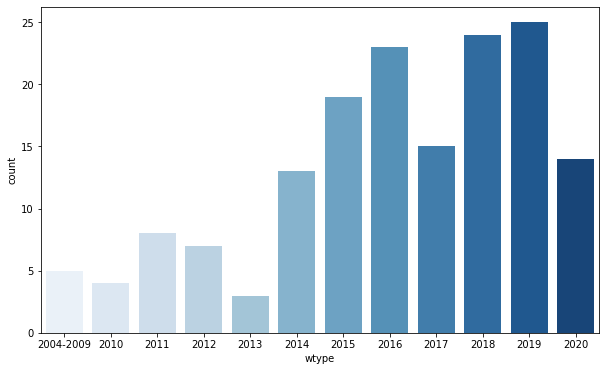

In [200]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="wtype", data=data_anno, order=['2004-2009','2010', '2011', '2012', '2013', '2014', 
                                              '2015', '2016', '2017', '2018', '2019', '2020'], palette='Blues')
ax.figure.savefig('numberofpapers_peryear.svg')

## Papers per country

In [179]:
data_anno.Country.unique()

array(['Greece', 'Spain', 'Israel', 'USA', 'The Netherlands', 'Japan',
       'Sweden', 'Italy', 'Kazakhstan', 'Germany', 'Iran', 'UK', 'Turkey',
       'Denmark', 'Portugal', 'Finland', 'Pakistan', 'Ecuador', 'China',
       'Switzerland', 'Taiwan', 'Singapore', 'South Korea'], dtype=object)

In [180]:
data_anno

,DOI,Country,Robot/s used (?),Adult vs Children,wtype,"Role (Pr = presenter, TA = teaching assistant, Te = teacher, Pe = peer, Tu = tutor)",Curriculum,nb students per robot,students_nb,Communicative gestures vs functional actions,WoZ,Autonomy,Contain Retention component?,Matos,Material,Included
0,10.21125/inted.2020.1926,Greece,Nao,Ch,2020,Pe,handwriting,1,1,CO+FU,No,Scripted,No,tablet,tablet,Yes
1,10.3389/frobt.2020.00015,Spain,Haru,Ch,2020,Tu,problem solving,1,1,CO,Yes,WOZ,No,tangible(s),tangibles,Yes
2,10.3389/frobt.2019.00148,Israel,Nao,Ad,2020,Te,HCI,3,small,CO,No,Scripted,No,tablet,tablet,Yes
3,10.1145/3319502.3374822,USA,Tega,Ch,2020,Tu,Vocabulary,1,1,CO,No,Scripted,No,tablet,tablet,Yes
4,10.1145/3319502.3374803,The Netherlands,Zeno,Ch,2020,Tu,problem solving,1,1,CO,No,Scripted,No,tangible(s)+tablet,tablet+tangible,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,10.1109/icalt.2006.1652373,Taiwan,Robosapien,Ch,2004-2009,Te,L2,33,class,CO,No,Scripted,No,-,-,Yes
188,10.1109/roman.2008.4600664,South Korea,iRobiQ,Ch,2004-2009,Te,L2,1,1,CO,No,Scripted,No,tangible(s),book,Yes
189,10.1007/978-3-642-03986-7_24,Japan,SAYA/MOBiMacs,Ch,2004-2009,Te,NaN,1,1,CO,NaN,NaN,Yes,tangible(s),cards,Yes
190,10.3745/jips.2008.4.4.159,South Korea,IROBI,Ch,2004-2009,Te,L2,1,1,CO,No,Scripted,No,-,-,Yes


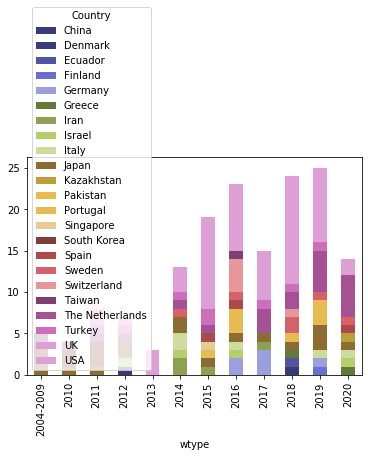

In [205]:
df_plot = data_anno.groupby(['wtype', 'Country']).size().reset_index().pivot(columns='Country', index='wtype', values=0)

ax = df_plot.plot(kind='bar', stacked=True, cmap='tab20b')

ax.figure.savefig('countries.svg')
#plt.figure(figsize=(20,10))
#ax = sns.countplot(x="wtype", data=data_anno, order=['2004-2009','2010', '2011', '2012', '2013', '2014', 
#                                                  '2015', '2016', '2017', '2018', '2019', '2020'], hue=data_anno.Country)

## Robot Used

In [182]:
data_anno['Robot/s used (?)'].unique()

array(['Nao', 'Haru', 'Tega', 'Zeno', 'Sota', 'Furhat',
       'MecWilly/Bluebot', 'SocibotMini', 'DragonBot', 'Repiro',
       'Wakamaru', 'Keepon', 'Robotive', 'Nao/Robovie', 'Robovie',
       'Nao torso', 'Bandit', 'Darwin', 'Robovie/Lego', 'Geminoid',
       'Pepper', 'IRI', 'SPRITE', 'WittyWorxk', 'Jibo', 'InMoov',
       'instruMentor', 'CommU', 'stuffed toy robot', nan,
       'Einstein Hanson', 'Minnie', 'Maki', 'Bioloid', 'EMYS', 'ifbot',
       'MantaroBot Classic', 'Lego', 'Robothespian', 'Meka', 'R3', 'LEGO',
       'KTX-PC ', 'ROBOSEM', 'SAYA', 'Mero/Engkey', 'iCat', 'HOAP-3',
       'Robosapien', 'iRobiQ', 'SAYA/MOBiMacs', 'IROBI'], dtype=object)

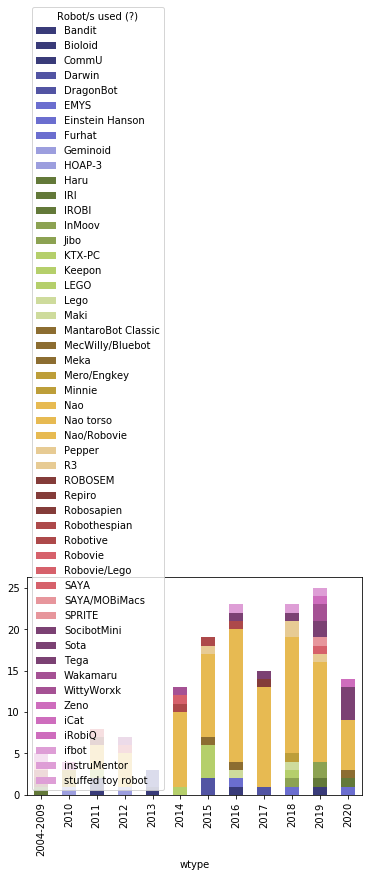

In [204]:
df_plot = data_anno.groupby(['Robot/s used (?)', 'wtype']).size().reset_index().pivot(columns='Robot/s used (?)', index='wtype', values=0)

ax = df_plot.plot(kind='bar', stacked=True, cmap='tab20b')
ax.figure.savefig('robots.svg')


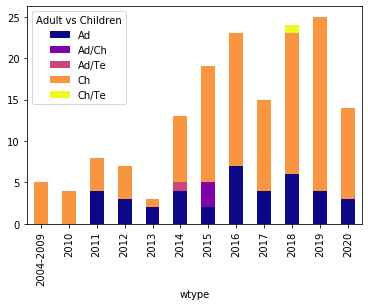

In [206]:
df_plot = data_anno.groupby(['Adult vs Children', 'wtype']).size().reset_index().pivot(columns='Adult vs Children', index='wtype', values=0)

ax = df_plot.plot(kind='bar', stacked=True, cmap='plasma')

ax.figure.savefig('learner_cat.svg')


## Roles
'Role (Pr = presenter, TA = teaching assistant, Te = teacher, Pe = peer, Tu = tutor)'

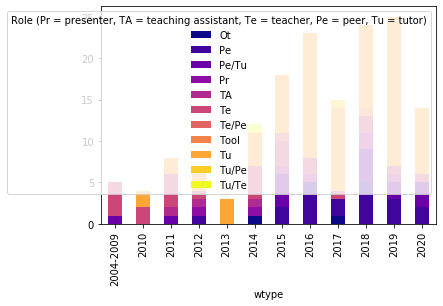

In [207]:
df_plot = data_anno.groupby(['Role (Pr = presenter, TA = teaching assistant, Te = teacher, Pe = peer, Tu = tutor)', 
                             'wtype']).size().reset_index().pivot(columns='Role (Pr = presenter, TA = teaching assistant, Te = teacher, Pe = peer, Tu = tutor)', index='wtype', values=0)

ax = df_plot.plot(kind='bar', stacked=True, cmap='plasma')
ax.figure.savefig('roles.svg')

## Curriculum


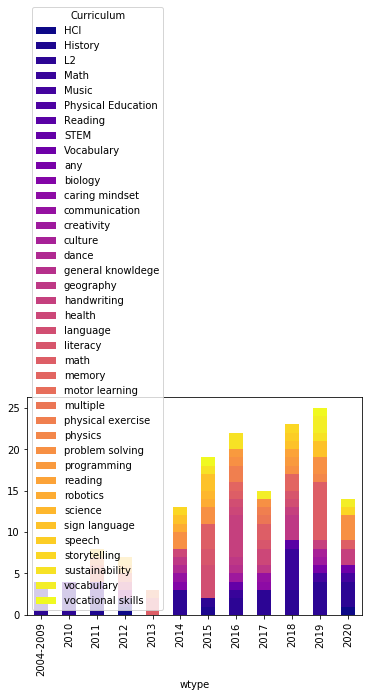

In [208]:
df_plot = data_anno.groupby(['Curriculum', 
                             'wtype']).size().reset_index().pivot(columns='Curriculum', index='wtype', values=0)

ax = df_plot.plot(kind='bar', stacked=True, cmap='plasma')
ax.figure.savefig('curriculum.svg')

## Nb of students per robots *

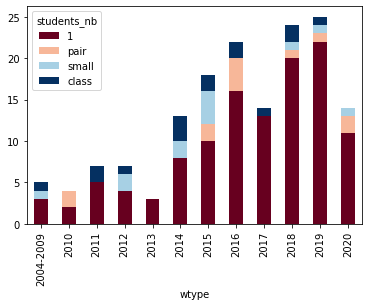

In [210]:
df_plot = data_anno.groupby(['students_nb', 
                             'wtype']).size().reset_index().pivot(columns='students_nb', index='wtype', values=0)

ax = df_plot[[1,'pair','small','class']].plot(kind='bar', stacked=True, cmap=plt.cm.get_cmap('RdBu', 4))

ax.figure.savefig('nbstudents.svg')

## Communicative gestures vs functional actions *

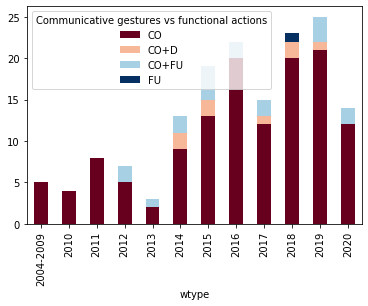

In [211]:
df_plot = data_anno.groupby(['Communicative gestures vs functional actions', 
                             'wtype']).size().reset_index().pivot(columns='Communicative gestures vs functional actions', index='wtype', values=0)

ax = df_plot.plot(kind='bar', stacked=True, cmap=plt.cm.get_cmap('RdBu', 4))
ax.figure.savefig('motion.svg')

## Retention *
Contain Retention component?

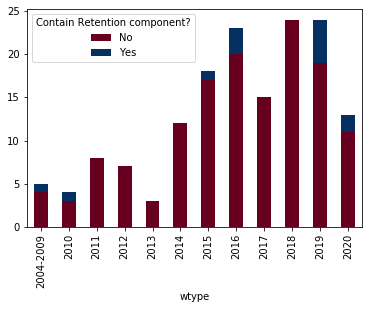

In [212]:
df_plot = data_anno.groupby(['Contain Retention component?', 
                             'wtype']).size().reset_index().pivot(columns='Contain Retention component?', index='wtype', values=0)

ax = df_plot.plot(kind='bar', stacked=True, cmap=plt.cm.get_cmap('RdBu', 2))
ax.figure.savefig('retention.svg')

## Autonomy *

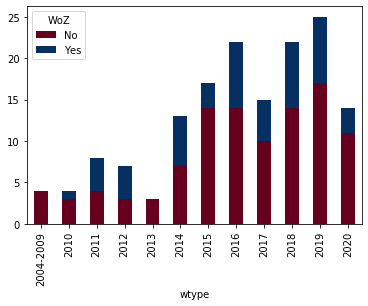

In [213]:
df_plot = data_anno.groupby(['WoZ', 
                             'wtype']).size().reset_index().pivot(columns='WoZ', index='wtype', values=0)

ax = df_plot.plot(kind='bar', stacked=True, cmap=plt.cm.get_cmap('RdBu', 2))
ax.figure.savefig('autonomy.svg')

## Material *

In [10]:
df_plot = data_anno.groupby(['Matos', 
                             'wtype']).size().reset_index().pivot(columns='Matos', index='wtype', values=0)

df_plot.columns

Index(['-', 'PC', 'PC+tangible(s)', 'screen', 'screen+tablet', 'tablet',
       'tangible(s)', 'tangible(s)+screen', 'tangible(s)+tablet'],
      dtype='object', name='Matos')

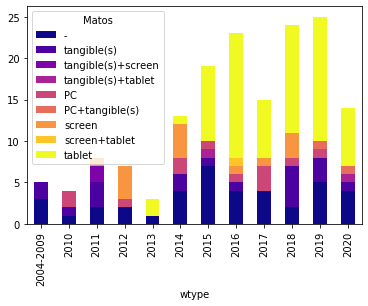

In [11]:
ax = df_plot[['-', 'tangible(s)', 'tangible(s)+screen', 
              'tangible(s)+tablet', 'PC', 'PC+tangible(s)', 
              'screen', 'screen+tablet', 'tablet']].plot(kind='bar', 
                                                         stacked=True, cmap=plt.cm.get_cmap('plasma', 9))
ax.figure.savefig('material2.svg')

# Cog vs Aff*

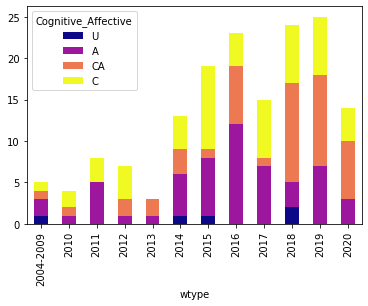

In [9]:
df_plot = data_anno.groupby(['Cognitive_Affective', 
                             'wtype']).size().reset_index().pivot(columns='Cognitive_Affective', index='wtype', values=0)

ax = df_plot[['U','A','CA', 'C']].plot(kind='bar', stacked=True, cmap=plt.cm.get_cmap('plasma', 4))
ax.figure.savefig('cog_aff2.svg')

# Last 5 years papers

In [5]:
fiveyears = ['2016', '2017', '2018', '2019', '2020']

In [17]:
recent_papers = data_anno[data_anno.nyear >= 2016]

In [18]:
recent_papers.reset_index(inplace=True)

In [19]:
recent_papers

,index,DOI,Country,Robot/s used (?),Adult vs Children,nyear,wtype,"Role (Pr = presenter, TA = teaching assistant, Te = teacher, Pe = peer, Tu = tutor)",Curriculum,nb students per robot,students_nb,Communicative gestures vs functional actions,WoZ,Autonomy,Contain Retention component?,Matos,Material,Included,Cognitive/Affective,Cognitive_Affective
0,0,10.21125/inted.2020.1926,Greece,Nao,Ch,2020,2020,Pe,handwriting,1,1,CO+FU,No,Scripted,No,tablet,tablet,Yes,cognitive and affective,CA
1,1,10.3389/frobt.2020.00015,Spain,Haru,Ch,2020,2020,Tu,problem solving,1,1,CO,Yes,WOZ,No,tangible(s),tangibles,Yes,cognitive,C
2,2,10.3389/frobt.2019.00148,Israel,Nao,Ad,2020,2020,Te,HCI,3,small,CO,No,Scripted,No,tablet,tablet,Yes,affective,A
3,3,10.1145/3319502.3374822,USA,Tega,Ch,2020,2020,Tu,Vocabulary,1,1,CO,No,Scripted,No,tablet,tablet,Yes,cognitive and affective,CA
4,4,10.1145/3319502.3374803,The Netherlands,Zeno,Ch,2020,2020,Tu,problem solving,1,1,CO,No,Scripted,No,tangible(s)+tablet,tablet+tangible,Yes,cognitive,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,119,10.1109/hri.2016.7451747,Switzerland,Nao,Ch,2016,2016,Pe,handwriting,1,1,CO,No,autonomous,No,tablet,tablet,Yes,affective,A
97,120,10.1109/HRI.2016.7451757,UK,Nao,Ch,2016,2016,Tu,L2,1,1,CO,Yes,WOZ+scripted,Yes,tablet,tablet,Yes,affective (perceived verbal availability),A
98,121,10.1109/hri.2016.7451758,Switzerland,Nao,Ch,2016,2016,Pe,handwriting,1,1,CO,No,autonomous,Yes,tablet,tablet,Yes,cognitive and affective,CA
99,122,10.1109/mra.2016.2546700,Switzerland,Nao,Ch,2016,2016,Pe,handwriting,1,1,CO,No,autonomous,Yes,tablet,tablet,Yes,cognitive and affective,CA


In [23]:
cr = Crossref()
cr_df = pd.DataFrame()



In [24]:
for p in range(len(recent_papers)): 
    print(recent_papers.loc[p])
    if(recent_papers.at[p,'DOI'] !='' and recent_papers.at[p,'DOI'] !='nan'):
        print(recent_papers.at[p,'DOI'])
        try:
            jsdata = cr.works(ids=[recent_papers.at[p,'DOI']])
            print('got data')
        except:
            print(recent_papers.at[p,'DOI'])
            print("Query failed")
            r = dict(recent_papers.loc[p])
            cr_df = cr_df.append(r, ignore_index = True)
            continue
        print('parsing ...')
        if (jsdata['status'] == 'ok'):
            r = dict(recent_papers.loc[p])
            r.update(jsdata['message'])
            cr_df = cr_df.append(r, ignore_index = True)
        print('done-------------------------------')
        
        
    else:
        print(df.loc[p])

index                                                                                                         0
DOI                                                                                    10.21125/inted.2020.1926
Country                                                                                                  Greece
Robot/s used (?)                                                                                            Nao
Adult vs Children                                                                                            Ch
nyear                                                                                                      2020
wtype                                                                                                      2020
Role (Pr = presenter, TA = teaching assistant, Te = teacher, Pe = peer, Tu = tutor)                          Pe
Curriculum                                                                                          hand

In [25]:
cr_df.to_excel('five_lastY.xlsx', index=False)
print('DONE!')

DONE!


# Human-likeness

In [153]:
hl = pd.DataFrame()

hl['Robots'] = data_anno["Robot/s used (?)"].unique()
hl['Human-likeliness'] = 0
hl['Facial Features'] = 0
hl['Body Manipulators'] = 0
hl['Surface Look'] = 0

In [155]:
hl.to_csv('Robots_ABOT_HumanLikeness.csv', index=False, sep=';')

# Publication Venue

In [159]:
cr = Crossref()

In [220]:
cr_df = pd.DataFrame()
data_anno.reset_index(inplace=True)
for p in range(len(data_anno)): 
    print(data_anno.loc[p])
    if(data_anno.at[p,'DOI'] !='' and data_anno.at[p,'DOI'] !='nan'):
        print(data_anno.at[p,'DOI'])
        try:
            jsdata = cr.works(ids=[data_anno.at[p,'DOI']])
            print('got data')
        except:
            print(data_anno.at[p,'DOI'])
            print("Query failed")
            r = dict(data_anno.loc[p])
            cr_df = cr_df.append(r, ignore_index = True)
            continue
        print('parsing ...')
        if (jsdata['status'] == 'ok'):
            r = dict(data_anno.loc[p])
            r.update(jsdata['message'])
            cr_df = cr_df.append(r, ignore_index = True)
        print('done-------------------------------')
        
        
    else:
        print(df.loc[p])

index                                                                                                         0
DOI                                                                                    10.21125/inted.2020.1926
Country                                                                                                  Greece
Robot/s used (?)                                                                                            Nao
Adult vs Children                                                                                            Ch
wtype                                                                                                      2020
Role (Pr = presenter, TA = teaching assistant, Te = teacher, Pe = peer, Tu = tutor)                          Pe
Curriculum                                                                                          handwriting
nb students per robot                                                                                   

In [221]:
cr_df

,Adult vs Children,Autonomy,Communicative gestures vs functional actions,Contain Retention component?,Country,Curriculum,DOI,ISBN,Included,Material,...,publisher-location,abstract,issue,journal-issue,language,page,subject,assertion,archive,article-number
0,Ch,Scripted,CO+FU,No,Greece,handwriting,10.21125/inted.2020.1926,[9788409179398],Yes,tablet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ch,WOZ,CO,No,Spain,problem solving,10.3389/frobt.2020.00015,NaN,Yes,tangibles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ad,Scripted,CO,No,Israel,HCI,10.3389/frobt.2019.00148,NaN,Yes,tablet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ch,Scripted,CO,No,USA,Vocabulary,10.1145/3319502.3374822,[9781450367462],Yes,tablet,...,"New York, NY, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ch,Scripted,CO,No,The Netherlands,problem solving,10.1145/3319502.3374803,[9781450367462],Yes,tablet+tangible,...,"New York, NY, USA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Ch,Scripted,CO,No,Taiwan,L2,10.1109/icalt.2006.1652373,[0769526322],Yes,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,Ch,Scripted,CO,No,South Korea,L2,10.1109/roman.2008.4600664,[9781424422128],Yes,book,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,Ch,NaN,CO,Yes,Japan,NaN,10.1007/978-3-642-03986-7_24,"[9783642039850, 9783642039867]",Yes,cards,...,"Berlin, Heidelberg",NaN,NaN,NaN,NaN,204-213,NaN,NaN,NaN,NaN
158,Ch,Scripted,CO,No,South Korea,L2,10.3745/jips.2008.4.4.159,NaN,Yes,-,...,NaN,NaN,4,"{'published-print': {'date-parts': [[2008, 12,...",en,159-168,NaN,NaN,NaN,NaN


In [222]:
cr_df.to_excel('annotated_cross_ref.xlsx')

# Viz publication

In [239]:
data = pd.read_excel('annotated_cross_ref.xlsx')
data.Field.unique()

array(['TEL', 'Robotics and AI', 'HRI', 'Social Robotics', 'HCI',
       'Psychology', 'Other', nan], dtype=object)

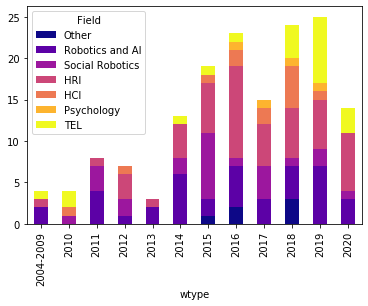

In [240]:
df_plot = data.groupby(['Field', 
                             'wtype']).size().reset_index().pivot(columns='Field', index='wtype', values=0)

ax = df_plot[['Other','Robotics and AI', 'Social Robotics', 'HRI', 'HCI', 'Psychology', 'TEL']].plot(kind='bar', stacked=True, cmap='plasma')
ax.figure.savefig('publication-venue.svg')